In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import pickle

In [3]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
sub = pd.read_csv('sample_submission.csv')
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

pd.set_option('display.max_columns', None)
plt.style.use(style='seaborn')

In [4]:
print(train_transaction.info())
print(train_identity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          12

In [5]:
train_identity.head()
train_transaction.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
train = pd.merge(train_transaction, train_identity, how='left', 
                 on='TransactionID', left_index=True, 
                right_index=True)

test = pd.merge(test_transaction, test_identity, how='left',
               on='TransactionID', left_index=True,
               right_index=True)

In [7]:
print(train.shape)
print(test.shape)

(590540, 434)
(506691, 433)


In [8]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.0000

we need to rename the name of id columns in test to make it match the train data

In [9]:
test = test.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03", 
                            "id-06": "id_06", "id-05": "id_05", "id-04": "id_04", 
                            "id-07": "id_07", "id-08": "id_08", "id-09": "id_09", 
                            "id-10": "id_10", "id-11": "id_11", "id-12": "id_12", 
                            "id-15": "id_15", "id-14": "id_14", "id-13": "id_13", 
                            "id-16": "id_16", "id-17": "id_17", "id-18": "id_18", 
                            "id-21": "id_21", "id-20": "id_20", "id-19": "id_19", 
                            "id-22": "id_22", "id-23": "id_23", "id-24": "id_24", 
                            "id-27": "id_27", "id-26": "id_26", "id-25": "id_25", 
                            "id-28": "id_28", "id-29": "id_29", "id-30": "id_30", 
                            "id-31": "id_31", "id-32": "id_32", "id-33": "id_33", 
                            "id-34": "id_34", "id-35": "id_35", "id-36": "id_36", 
                            "id-37": "id_37", "id-38": "id_38"})

In [10]:
print("Amount of null values in train data : ", train.isnull().sum().sum())
print("Amount of null values in test data : ", test.isnull().sum().sum())

Amount of null values in train data :  115523073
Amount of null values in test data :  90186908


In [14]:
train
test

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_sta

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA

.
.
.
.
.
NOW WE SPLIT THE DATA TO FRAUD AND NOT FRAUD TO FILL THE NULLS
.
.
.
.
.
BUT FIRST WE COMPRESS IT
.
.
.
.
.
.
.



In [15]:

def detect_num_cols_to_shrink(list_of_num_cols, dataframe):
 
    convert_to_int8 = []
    convert_to_int16 = []
    convert_to_int32 = []
    
    #  sadly the datatype float8 does not exist
    convert_to_float16 = []
    convert_to_float32 = []
    
    for col in list_of_num_cols:
        
        if dataframe[col].dtype in ['int', 'int8', 'int32', 'int64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 255:
                convert_to_int8.append(col)
            elif diff < 65535:
                convert_to_int16.append(col)
            elif diff < 4294967295:
                convert_to_int32.append(col)   
                
        elif dataframe[col].dtype in ['float', 'float16', 'float32', 'float64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 65535:
                convert_to_float16.append(col)
            elif diff < 4294967295:
                convert_to_float32.append(col) 
        
    list_of_lists = []
    list_of_lists.append(convert_to_int8)
    list_of_lists.append(convert_to_int16)
    list_of_lists.append(convert_to_int32)
    list_of_lists.append(convert_to_float16)
    list_of_lists.append(convert_to_float32)
    
    return list_of_lists





########### for train ####################
num_cols_to_shrink_trans = detect_num_cols_to_shrink(train.columns.tolist(), train)

convert_to_int8 = num_cols_to_shrink_trans[0]
convert_to_int16 = num_cols_to_shrink_trans[1]
convert_to_int32 = num_cols_to_shrink_trans[2]
convert_to_float16 = num_cols_to_shrink_trans[3]
convert_to_float32 = num_cols_to_shrink_trans[4]
print("____________________For Train_______________________\n")
print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")
print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

for col in convert_to_int16:
    train[col] = np.array(train[col].astype('int16'))
    
for col in convert_to_int32:
    train[col] = np.array(train[col].astype('int32'))

for col in convert_to_float16:
    train[col] = np.array(train[col].astype('float16'))
    
for col in convert_to_float32:
    train[col] = np.array(train[col].astype('float32'))



########### for test ####################
num_cols_to_shrink_trans = detect_num_cols_to_shrink(test.columns.tolist(), test)

convert_to_int8 = num_cols_to_shrink_trans[0]
convert_to_int16 = num_cols_to_shrink_trans[1]
convert_to_int32 = num_cols_to_shrink_trans[2]
convert_to_float16 = num_cols_to_shrink_trans[3]
convert_to_float32 = num_cols_to_shrink_trans[4]
print("____________________For Test__________________________\n")
print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")
print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

for col in convert_to_int16:
    test[col] = np.array(test[col].astype('int16'))
    
for col in convert_to_int32:
    test[col] = np.array(test[col].astype('int32'))

for col in convert_to_float16:
    test[col] = np.array(test[col].astype('float16'))
    
for col in convert_to_float32:
    test[col] = np.array(test[col].astype('float32'))




print('_______________________New ram usage is as follows____________________________\n\n')
train.info()
test.info()
print('______________________________________________________________________________\n\n')

____________________For Train_______________________

convert_to_int8 : ['isFraud'] 

convert_to_int16 : ['card1'] 

convert_to_int32 : ['TransactionID', 'TransactionDT'] 

convert_to_float16 : ['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V

.
.
.
.
.
.
.
.















FILLING THE NULLS HAPPENS HERE

.
.
.
.
.
.
.


In [16]:
#train
#test.shape

In [17]:

train_split = train.groupby(train.isFraud)
train_fraud = train_split.get_group(1)
train_notfraud = train_split.get_group(0)

In [18]:
#train_fraud.shape
#train_notfraud.shape

In [19]:
print('______________________________before_____________________________')
print("Amount of null in train fraud : ", train_fraud.isnull().sum().sum())
print("Amount of null in train not fraud : ", train_notfraud.isnull().sum().sum())
print("Amount of null in test : ", test.isnull().sum().sum())




train_fraud_cols = train_fraud.columns

for i in train_fraud_cols:
    if train_fraud[i].dtype == 'object':
        train_fraud[i] = train_fraud[i].fillna(train_fraud[i].mode()[0])


for i in train_fraud_cols:
    if ( i.startswith("C") or i.startswith("M") or i.startswith("V") or i.startswith("D") or i.startswith("addr") or i.startswith("dist") or i.startswith("id") or i.startswith('card')) and train_fraud[i].isnull().sum() > 0:
        train_fraud[i] = train_fraud[i].fillna(train_fraud[i].mode()[0])





#################################### filling the train_notfraud now #####################################
train_notfraud_cols = train_notfraud.columns

for i in train_notfraud_cols:
    if train_notfraud[i].dtype == 'object':
        train_notfraud[i] = train_notfraud[i].fillna(train_notfraud[i].mode()[0])


for i in train_notfraud_cols:
    if ( i.startswith("C") or i.startswith("M") or i.startswith("V") or i.startswith("D") or i.startswith("addr") or i.startswith("dist") or i.startswith("id") or i.startswith('card')) and train_notfraud[i].isnull().sum() > 0:
        train_notfraud[i] = train_notfraud[i].fillna(train_notfraud[i].mode()[0])







#################################### filling the test now #####################################
test_cols = test.columns

for i in test_cols:
    if test[i].dtype == 'object':
        test[i] = test[i].fillna(test[i].mode()[0])


for i in test_cols:
    if ( i.startswith("C") or i.startswith("M") or i.startswith("V") or i.startswith("D") or i.startswith("addr") or i.startswith("dist") or i.startswith("id") or i.startswith('card')) and test[i].isnull().sum() > 0:
        test[i] = test[i].fillna(test[i].mode()[0])


print('_______________________________________after_____________________________________')
print("Amount of null in train fraud : ", train_fraud.isnull().sum().sum())
print("Amount of null in train not fraud : ", train_notfraud.isnull().sum().sum())
print("Amount of null in test : ", test.isnull().sum().sum())

______________________________before_____________________________
Amount of null in train fraud :  3529885
Amount of null in train not fraud :  111993188
Amount of null in test :  90186908
_______________________________________after_____________________________________
Amount of null in train fraud :  0
Amount of null in train not fraud :  0
Amount of null in test :  0


In [20]:
train = pd.concat([train_fraud, train_notfraud])
#train
#train.shape

In [21]:
x = train.drop(['id_31', 'id_30', 'DeviceInfo', 'id_32', 'id_33', 'P_emaildomain', 'R_emaildomain'], axis=1)
x = pd.get_dummies(x)

testIDs = test['TransactionID']
test = test.drop(['TransactionID', 'id_31', 'id_30', 'DeviceInfo', 'id_32', 'id_33', 'P_emaildomain', 'R_emaildomain'], axis=1)
test = pd.get_dummies(test)


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


x_cols = x.columns.tolist()
test_cols = test.columns.tolist()

scaler = MinMaxScaler() 
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=x_cols)


test = scaler.fit_transform(test)
test = pd.DataFrame(test, columns=test_cols)
#x = data['isFraud']
#x_train, x_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.25, shuffle=False)


x.sort_values(by=['isFraud'])
x_split = x.groupby(x.isFraud)
x_fraud = x_split.get_group(1)
x_notfraud = x_split.get_group(0)




,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_23_IP_PROXY:ANONYMOUS,id_23_IP_PROXY:HIDDEN,id_23_IP_PROXY:TRANSPARENT,id_27_Found,id_27_NotFound,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_34_match_status:-1,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
295269,0.481154,0.0,0.437870,0.003372,0.293401,0.910,0.381679,0.919708,0.286364,0.836957,0.000000,0.000602,0.000427,0.000176,0.0,0.000000,0.008596,0.001776,0.000000,0.0000,0.009524,0.000000,0.000314,0.000000,0.006854,0.001400,0.850000,0.850000,0.014652,0.386478,0.029304,0.08682,0.0,0.000488,0.825777,0.621005,0.073306,0.113543,0.0,0.180205,0.651767,1.0,0.125,0.111111,0.166667,0.166667,0.111111,0.111111,0.125,0.125,0.00,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.285714,0.133333,0.0,0.000,0.076923,0.076923,0.142857,0.076923,0.0,0.0,0.2,0.111111,0.000000,0.000000,0.000000,0.000000,0.333333,0.2,0.018519,0.018519,0.000000,0.000000,1.0,0.000,0.000,0.020833,0.020833,0.166667,0.083333,0.2,0.2,0.0,0.000000,0.000000,0.0,0.000000,0.058824,0.019608,0.000000,0.0,0.0000,0.0000,0.333333,0.2,0.000000,0.000000,1.0,0.142857,0.125,0.0,0.2,0.166667,0.000000,0.0,0.000000,0.000,0.00,0.000000,0.033333,0.032258,0.000000,0.000000,0.000000,0.285714,0.285714,0.000000,0.000000,0.033333,0.033333,1.0,0.0,0.2,0.166667,0.000000,0.000000,0.0,0.000000,0.001418,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.142857,0.142857,0.111111,0.111111,0.111111,0.166667,0.166667,0.166667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.076923,0.076923,0.076923,0.000000,0.001674,0.000000,0.000000,0.004861,0.00

In [23]:

x_fraud = x_fraud.drop(['TransactionID', 'isFraud'], axis=1)
x_notfraud = x_notfraud.drop(['TransactionID', 'isFraud'], axis=1)

#x_fraud.shape
#x_notfraud.shape


In [24]:
for col in x_notfraud.columns:
    x_notfraud[col] = np.array(x_notfraud[col].astype('float16'))

Epoch 1/50
14247/14247 [==============================] - 37s 3ms/step - loss: 0.0340 - val_loss: 0.0216
Epoch 2/50
14247/14247 [==============================] - 35s 2ms/step - loss: 0.0231 - val_loss: 0.0207
Epoch 3/50
14247/14247 [==============================] - 34s 2ms/step - loss: 0.0218 - val_loss: 0.0181
Epoch 4/50
14247/14247 [==============================] - 38s 3ms/step - loss: 0.0209 - val_loss: 0.0171
Epoch 5/50
14247/14247 [==============================] - 40s 3ms/step - loss: 0.0205 - val_loss: 0.0168
Epoch 6/50
14247/14247 [==============================] - 39s 3ms/step - loss: 0.0201 - val_loss: 0.0162
Epoch 7/50
14247/14247 [==============================] - 38s 3ms/step - loss: 0.0199 - val_loss: 0.0161
Epoch 8/50
14247/14247 [==============================] - 39s 3ms/step - loss: 0.0198 - val_loss: 0.0160
Epoch 9/50
14247/14247 [==============================] - 42s 3ms/step - loss: 0.0197 - val_loss: 0.0158
Epoch 10/50
14247/14247 [==============================

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

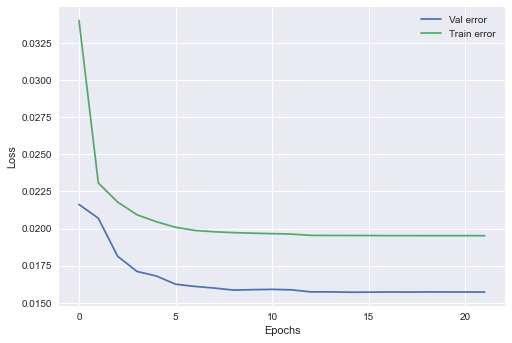

In [52]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout,Input,BatchNormalization , Add

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam




es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=7)

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-9)



encoder_input = Input(462,name = 'input_encoder')
encoder = Dense(128, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer4')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(32, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
#Encoder.summary()



decoder_input = Input(32,name = 'input_decoder')
decoder = Dense(32, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='tanh',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer4')(decoder)
decoder = Dense(64, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(462,activation = 'sigmoid',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
#Decoder.summary()



autoencoder_input = Input(462, name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data], name = 'AutoEncoder')

#autoencoder.summary()


sgd = SGD(lr=0.005, momentum=0.99)
autoencoder.compile(optimizer=sgd, loss='mae')



history = autoencoder.fit(x_notfraud, x_notfraud,
                    batch_size = 32,
                    validation_split = 0.2,
                              epochs= 50,
                              callbacks=[es , lrr])

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')


plt.show()



In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve


# valid_x_predictions = autoencoder.predict(x.drop(['TransactionID', 'isFraud'], axis=1))
# mse = np.mean(np.abs(x.drop(['TransactionID', 'isFraud'], axis=1) - valid_x_predictions), axis=1)
# error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': x['isFraud']})



In [28]:

# threshold_fixed = 0.03
# LABELS = ["Real","Fraud"]


# pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
# conf_matrix = confusion_matrix(error_df.True_class, pred_y)
# plt.figure(figsize=(12, 12))
# sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
# plt.title("Treshold of 0.03")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

In [29]:
#test = test.drop(['isFraud'], axis=1)

In [30]:
test.shape

(506691, 459)

In [31]:
# for cols in x.columns :
#     if cols not in test.columns :
#         print(cols)

test['card6_debit or credit'] = np.zeros((506691))
test['id_34_match_status:-1'] = np.zeros((506691))
test['id_34_match_status:0'] = np.zeros((506691))
test.shape

(506691, 462)

In [32]:
for col in test.columns:
    test[col] = np.array(test[col].astype('float16'))

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 462 entries, TransactionDT to id_34_match_status:0
dtypes: float16(462)
memory usage: 446.5 MB


In [33]:

test_predictions = autoencoder.predict(test)
mae = np.mean(np.abs(test - test_predictions), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mae})
threshold_fixed_test = 0.04



In [34]:

pred_test = [1 if e > threshold_fixed_test else 0 for e in error_df_test.Reconstruction_error.values]
error_df_test['TransactionID'] = testIDs
error_df_test['isFraud'] = pred_test


In [38]:
error_df_test = error_df_test.drop(['Reconstruction_error'], axis=1)
error_df_test.to_csv('submit1-0.04.csv', index=False)

NEW APPROACH TO COMPARE

In [50]:
ann_inp_fraud = x_fraud[0:20000]
ann_inp_notfraud = x_notfraud[0:20000]


In [51]:
ann_inp_fraud_pr = Encoder.predict(ann_inp_fraud)

In [59]:
ann_inp_notfraud_pr = Encoder.predict(ann_inp_notfraud)

In [61]:

ann_inp_final = np.concatenate([ann_inp_notfraud_pr, ann_inp_notfraud_pr], axis=0)
ann_inp_final.shape

(40000, 32)

In [68]:
ans1 = np.array([0 for i in range(20000)])
ans2 = np.array([1 for i in range(20000)])
ann_ans = np.concatenate([ans1, ans2], axis=0)
ann_ans.shape

(40000,)

Epoch 1/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2646 - val_loss: 0.4054
Epoch 2/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2349 - val_loss: 0.3601
Epoch 3/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2349 - val_loss: 0.3790
Epoch 4/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2350 - val_loss: 0.3943
Epoch 5/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2350 - val_loss: 0.3798
Epoch 6/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2349 - val_loss: 0.3774
Epoch 7/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2349 - val_loss: 0.4218
Epoch 8/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2350 - val_loss: 0.4506
Epoch 9/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2347 - val_loss: 0.3880
Epoch 10/20
500/500 [==============================] - 1s 1ms/step - loss: 0.2348 - val_loss: 0.3723

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss Rate')

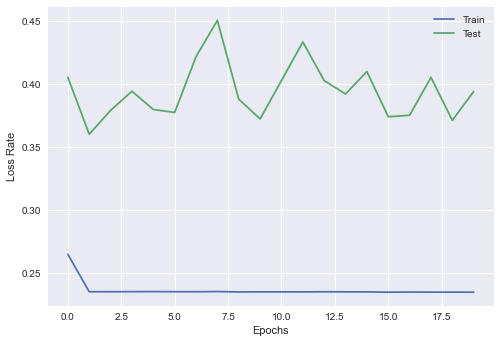

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
ann = Sequential()

ann.add(tf.keras.layers.Dense(64, input_shape=(32,) ))
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(64))
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(32))
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(16))
ann.add(tf.keras.layers.Activation('linear'))
ann.add(tf.keras.layers.Dense(1))


opt = tf.keras.optimizers.Adam(learning_rate=0.005)
ann.compile(optimizer=opt, loss='mse')

history = ann.fit(ann_inp_final, ann_ans, validation_split = 0.2, batch_size=64, epochs=20,  )



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Rate')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()



In [81]:
ann.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)               

In [74]:
#from sklearn.metrics import confusion_matrix, precision_recall_curve
#from sklearn.metrics import recall_score, classification_report, auc, roc_curve
pred_test_ann = Encoder.predict(test)

pred_ann = ann.predict(pred_test_ann)

# conf_matrix = confusion_matrix(x['isFraud'], pred_ann)
# plt.figure(figsize=(12, 12))
# sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

In [77]:
pred_ann = pred_ann.reshape((506691))
pred_ann.shape

(506691,)

In [78]:
error_df_test_ann = pd.DataFrame({'TransactionID': testIDs, 'isFraud': pred_ann})

In [80]:
error_df_test_ann.to_csv('ann_submission.csv', index=False)